# =============================================================================
# IMPORT LIBRARIES
# =============================================================================

In [2]:
import pandas as pd
import seaborn as sns
import numpy as nm
import matplotlib.pyplot as plt
df = pd.read_csv('dataset/used_cars.csv')
data = pd.read_csv('dataset/used_cars_dataset.csv')

plt.style.use('default')
sns.set_palette("husl")

print("Library berhasil diimport")

Library berhasil diimport


# =============================================================================
# LOAD DATASET
# =============================================================================

In [3]:
df = pd.read_csv('dataset/used_cars.csv')
print("✅ Dataset berhasil diload!")

✅ Dataset berhasil diload!


# =============================================================================
# DATA CLEANING
# Hapus karakter non-numerik dari kolom price dan milage, lalu konversi ke float
# =============================================================================

In [4]:
print("🧹 Cleaning Data...")

# Price cleaning
df['price'] = df['price'].str.replace('$', '', regex=False)
df['price'] = df['price'].str.replace(',', '', regex=False)
df['price'] = df['price'].astype(float)

# Milage cleaning  
df['milage'] = df['milage'].str.replace('mi.', '', regex=False)
df['milage'] = df['milage'].str.replace(',', '', regex=False)
df['milage'] = df['milage'].astype(float)

print("Cleaning Data Selesai ✅")

print(f"Price dtype: {df['price'].dtype}")
print(f"Milage dtype: {df['milage'].dtype}")
print(f"Sample price: {df['price'].head(3).tolist()}")
print(f"Sample milage: {df['milage'].head(3).tolist()}")

🧹 Cleaning Data...
Cleaning Data Selesai ✅
Price dtype: float64
Milage dtype: float64
Sample price: [10300.0, 38005.0, 54598.0]
Sample milage: [51000.0, 34742.0, 22372.0]


# =============================================================================
# STATISTIK DESKRIPTIF
# =============================================================================

In [5]:
print("📊 Statistik Deskriptif")
numeric_cols = ['model_year', 'milage', 'price']

desc_stats = df[numeric_cols].describe().round(2)
desc_stats.loc['Q1'] = df[numeric_cols].quantile(0.25)
desc_stats.loc['Q2'] = df[numeric_cols].quantile(0.5)
desc_stats.loc['Q3'] = df[numeric_cols].quantile(0.75)

desc_stats = desc_stats.reindex(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

print("Statistik Deskriptif untuk Atribut Numerik:")
print(desc_stats)

📊 Statistik Deskriptif
Statistik Deskriptif untuk Atribut Numerik:
       model_year     milage       price
count     4009.00    4009.00     4009.00
mean      2015.52   64717.55    44553.19
std          6.10   52296.60    78710.64
min       1974.00     100.00     2000.00
25%       2012.00   23044.00    17200.00
50%       2017.00   52775.00    31000.00
75%       2020.00   94100.00    49990.00
max       2024.00  405000.00  2954083.00


# =============================================================================
# MENAMPILKAN 10 RECORD PERTAMA
# =============================================================================

In [6]:
print("\n10 Record Pertama (Atribut Numerik):")
print(df[numeric_cols].head(10))


10 Record Pertama (Atribut Numerik):
   model_year    milage    price
0        2013   51000.0  10300.0
1        2021   34742.0  38005.0
2        2022   22372.0  54598.0
3        2015   88900.0  15500.0
4        2021    9835.0  34999.0
5        2016  136397.0  14798.0
6        2017   84000.0  31000.0
7        2001  242000.0   7300.0
8        2021   23436.0  41927.0
9        2020   34000.0  69950.0


# =============================================================================
# MENAMPILKAN INFORMASI DATASET (jumlah record, jumlah atribut, nama atribut, tipe angka)
# =============================================================================

In [7]:
print("\nInformasi Dataset:")
print(f"Jumlah Record: {df.shape[0]}")
print(f"Jumlah Attribute: {df.shape[1]}")
print(f"Nama Attribute: {list(df.columns)}")
print(f"Jumlah Attribute Numerik: {len(numeric_cols)}")
print(f"Attribute Bertipe Angka: {numeric_cols}")


Informasi Dataset:
Jumlah Record: 4009
Jumlah Attribute: 12
Nama Attribute: ['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']
Jumlah Attribute Numerik: 3
Attribute Bertipe Angka: ['model_year', 'milage', 'price']


# =============================================================================
# MENAMPILKAN JUMLAH LABEL UNTUK ATRIBUT OBJEK
# =============================================================================

In [8]:
object_cols = df.select_dtypes(include='object').columns

print("\nJumlah Label per Atribut Object:")
for col in object_cols:
    print(f"{col}: {df[col].nunique()} nilai unik")


Jumlah Label per Atribut Object:
brand: 57 nilai unik
model: 1898 nilai unik
fuel_type: 7 nilai unik
engine: 1146 nilai unik
transmission: 62 nilai unik
ext_col: 319 nilai unik
int_col: 156 nilai unik
accident: 2 nilai unik
clean_title: 1 nilai unik


# =============================================================================
# VISUALISASI DATA
# =============================================================================

📈 Visualisasi Data - Histogram


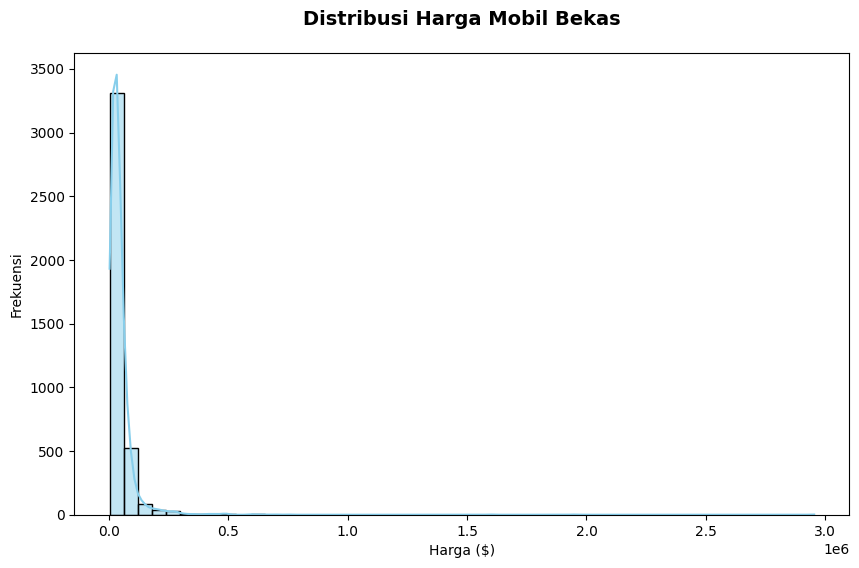

In [9]:
print("📈 Visualisasi Data - Histogram")
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribusi Harga Mobil Bekas', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Harga ($)')
plt.ylabel('Frekuensi')
plt.show()

# =============================================================================
# HEATMAP KORELASI
# =============================================================================

Heatmap Korelasi Dataset
Matriks Korelasi:
            model_year  milage  price
model_year       1.000  -0.618  0.199
milage          -0.618   1.000 -0.306
price            0.199  -0.306  1.000


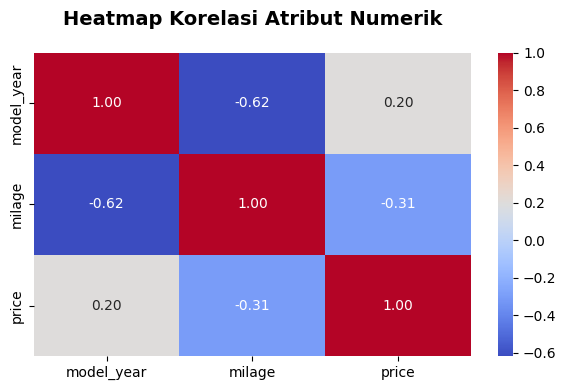

In [10]:
print("Heatmap Korelasi Dataset")

corr_matrix = df[numeric_cols].corr()

print("Matriks Korelasi:")
print(corr_matrix.round(3))

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Atribut Numerik', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# =============================================================================
# VISUALISASI TAMBAHAN (Scatter plot: hubungan antara milage dan price)
# =============================================================================

Visualisasi Tambahan untuk hubungan milage dan price


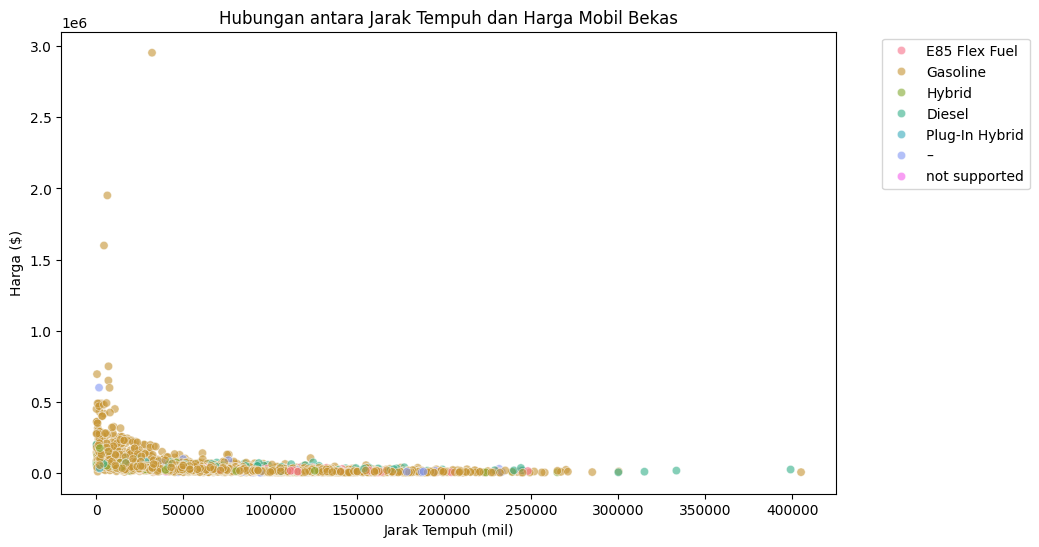

In [11]:
print("Visualisasi Tambahan untuk hubungan milage dan price")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='milage', y='price', hue='fuel_type', alpha=0.6)
plt.title('Hubungan antara Jarak Tempuh dan Harga Mobil Bekas')
plt.xlabel('Jarak Tempuh (mil)')
plt.ylabel('Harga ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 🔍 HASIL ANALISIS DATA:

# Gambaran Umum Data:
- Dataset berisi 4009 record dan 12 atribut, dengan 3 atribut numerik (model_year, milage, price).

- Rentang harga mobil bekas berkisar dari $2.000.00 hingga $2.954.083.00, dengan rata-rata sekitar $44.553.19.

- Mobil bekas umumnya berasal dari tahun 1974–2024, dengan rata-rata tahun model 2015.

- Jarak tempuh (milage) sangat bervariasi, dari 100 mil hingga 405.000 mil.

- Terdapat korelasi negatif antara milage dan price, artinya mobil dengan jarak tempuh lebih tinggi cenderung lebih murah.

- Distribusi harga miring ke kanan (right-skewed), menunjukkan banyak mobil dengan harga rendah dan beberapa mobil mewah dengan harga sangat tinggi.